In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

df = pd.read_csv("shots_2023.csv")


FOR ALL SHOTS
Count: 121629
Regression Coefficient: -0.0024926444765505204
Correlation Coefficient & p-value: (-0.5261775179781905, 0.0)



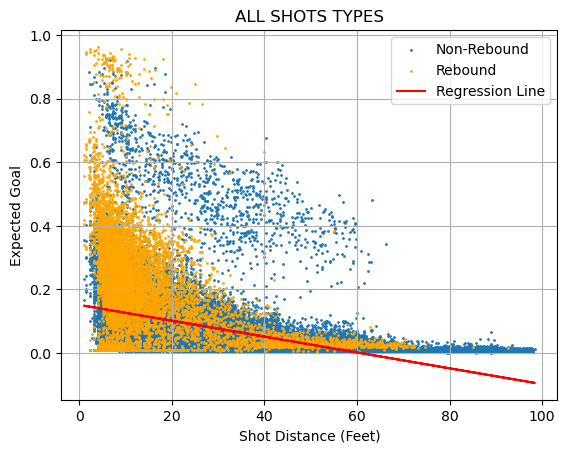

FOR WRIST SHOTS
Count: 66099
Regression Coefficient: -0.002487077681709671
Correlation Coefficient & p-value: (-0.5449548947360904, 0.0)



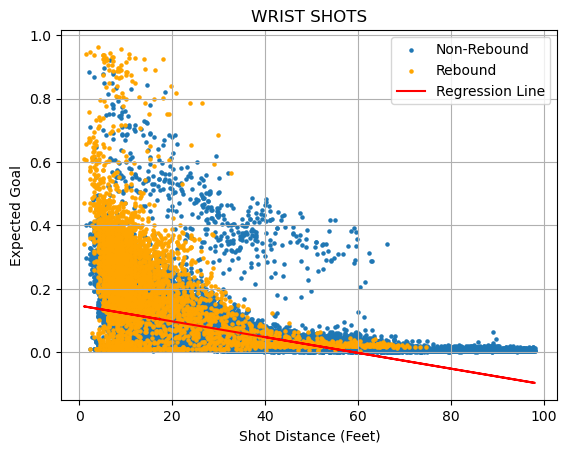

FOR SLAP SHOTS
Count: 14383
Regression Coefficient: -0.0020802745807712666
Correlation Coefficient & p-value: (-0.3955876856871551, 0.0)



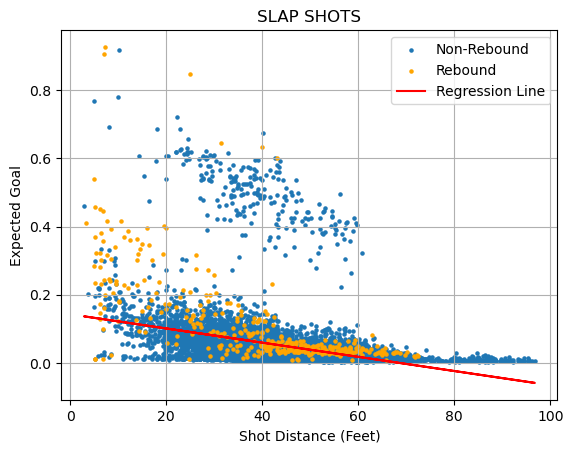

FOR SNAP SHOTS
Count: 17216
Regression Coefficient: -0.002909911529161706
Correlation Coefficient & p-value: (-0.5180764184264682, 0.0)



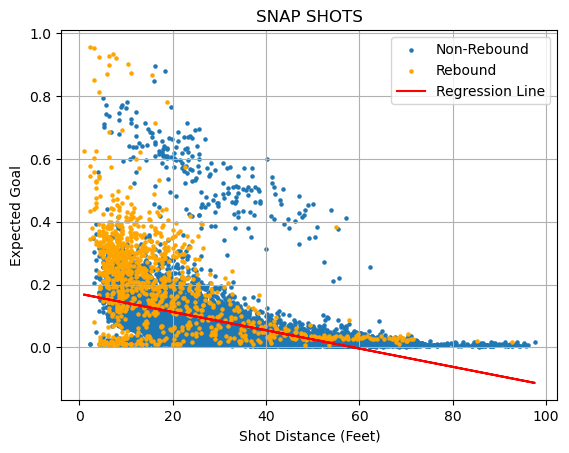

FOR TIP SHOTS
Count: 10777
Regression Coefficient: -0.00232203737033876
Correlation Coefficient & p-value: (-0.34882024492122937, 6.080759190519353e-306)



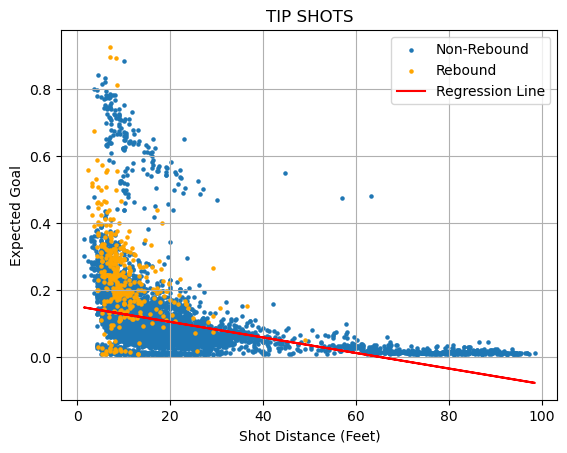

FOR BACK SHOTS
Count: 8664
Regression Coefficient: -0.0028840770033336884
Correlation Coefficient & p-value: (-0.44590467466984707, 0.0)



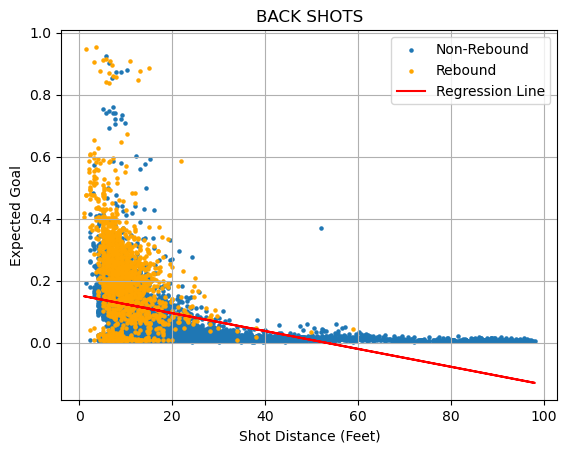

In [2]:
# Plot 1 ALL SHOTS

plt.figure()

all_shots = df[(df['shotOnEmptyNet'] == 0.0)] # shot taken with goal tender present
not_rebound_shot = df[(df['shotOnEmptyNet'] == 0.0) & (df['shotRebound'] == 0.0)]
rebound_shot = df[(df['shotOnEmptyNet'] == 0.0) & (df['shotRebound'] == 1.0)]

x = all_shots["shotDistance"]
y = all_shots["xGoal"]
x_not_rebound = not_rebound_shot["shotDistance"]
y_not_rebound = not_rebound_shot["xGoal"]
x_rebound = rebound_shot["shotDistance"]
y_rebound = rebound_shot["xGoal"]

plt.title("ALL SHOTS TYPES")
plt.xlabel("Shot Distance (Feet)")
plt.ylabel("Expected Goal")

plt.scatter(x_not_rebound, y_not_rebound, s=1, c='C0', label = "Non-Rebound")
plt.scatter(x_rebound, y_rebound, s=1, c='orange', label = "Rebound")

# linear regression model
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red', label = 'Regression Line')
plt.grid(True)
r, p_value = pearsonr(x, y)

def myFunc(x): #for predicting values based on linear regression model
    return m*x + b


print("FOR ALL SHOTS")
print(f"Count: {len(all_shots)}")
print(f"Regression Coefficient: {m}")
print(f"Correlation Coefficient & p-value: {r, p_value}")
print()
plt.legend()

plt.show()


# Plots of Specific Shot Type
shot_type = ["WRIST", "SLAP", "SNAP", "TIP", "BACK"]

for shotType in shot_type:
    plt.figure()
    
    shots = df[(df['shotType'] == shotType) &  
           (df['shotOnEmptyNet'] == 0)]
    shots_rebound = df[(df['shotType'] == shotType) &  
                   (df['shotOnEmptyNet'] == 0) &
                   (df['shotRebound'] == 1.0)]
    shots_not_rebound = df[(df['shotType'] == shotType) &  
                       (df['shotOnEmptyNet'] == 0) &
                       (df['shotRebound'] == 0.0)]

    x = shots["shotDistance"]
    y = shots["xGoal"]
    x_rebound = shots_rebound["shotDistance"]
    y_rebound = shots_rebound["xGoal"]
    x_not_rebound = shots_not_rebound["shotDistance"]
    y_not_rebound = shots_not_rebound["xGoal"]
        
    plt.scatter(x_not_rebound, y_not_rebound, s=5, c='C0', label = "Non-Rebound")
    plt.scatter(x_rebound, y_rebound, s=5, c='orange', label = "Rebound")
    plt.title(f"{shotType} SHOTS")
    plt.xlabel("Shot Distance (Feet)")
    plt.ylabel("Expected Goal")
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'red', label = "Regression Line")
    plt.grid(True)
    r, p_value = pearsonr(x, y)

    def myFunc(x): # for predicting values based on linear regression model
        return m*x + b
    
    print(f"FOR {shotType} SHOTS")
    print(f"Count: {len(shots)}")
    print(f"Regression Coefficient: {m}")
    print(f"Correlation Coefficient & p-value: {r, p_value}")
    print()
    plt.legend()
    plt.show()




Above is our initial plots to start getting a sense of what variables impact shot probabilities.

First, we plot All Shot types based on the variables of Shot Distance (Feet) and Expected Goals. To begin, we filter all shots taken to only include shots taken with a goal tender present. We then set our x and y variable, with x representing the shot distance values from our already filtered shots dataframe, and then set our y to represent the Expected Goal values of these same shots taken. Also, we split these filtered shots into rebound shots and non-rebound shots. We then plot both rebound shots and non-rebound shots against expected goals, as colorcoded in the chart's legend, whle also titling our scatter plot accordingly. After plotting the data, we plot a regression line based on the all plotted shots on the graph.

Then, we go on to look at how specific shot types impact expected goal values. We go through the same process of filtering the data into x and y variables, instead this time we included a statement to filter by specific shot types. We then plot these filtered x and y variables once again and to get the charts for specific shot types.

--- Initial Exploration of Variables ---
To begin getting a sense of what variables impact shot probability the most, we plotted **shot distance (in feet)** against **expected goals (xG)** for all shot types.
We filtered the data set to only include shots taken with a goaltender present, and then separated these shots into rebound and non-rebound attempts for comparison.

The scatter plot shows both rebound and non-rebound attempts color-coded in the legend, along with a regression line based on all shots taken with a goalkeeper present to capture the overall trend. As expected, **longer-distance shots tend to have lower xG values, and rebound shots generally hold higher xG values than non-rebound shots**.

Next, we repeated this process for specific shot types, like wrist shots, slap shots, and backhands. By filtering the dataset and plotting distance vs. xG for each shot type, we can see how **different shot mechanics impact scoring probability**.

FOR ALL SHOTS
Count: 121629
Regression Coefficient: -0.0024926444765505204
Correlation Coefficient & p-value: (-0.5261775179781905, 0.0)



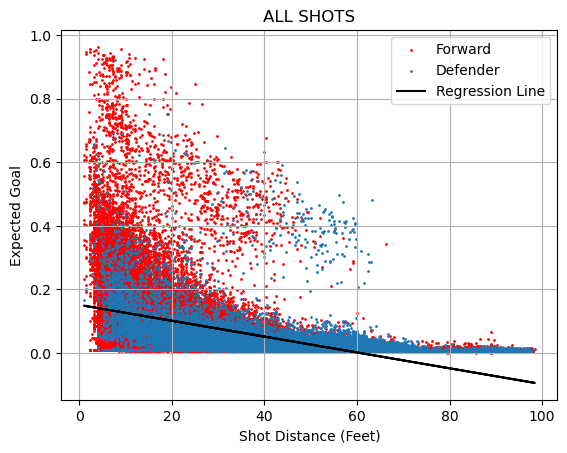

FOR WRIST SHOTS
Count: 66099
Regression Coefficient: -0.002487077681709671
Correlation Coefficient & p-value: (-0.5449548947360904, 0.0)



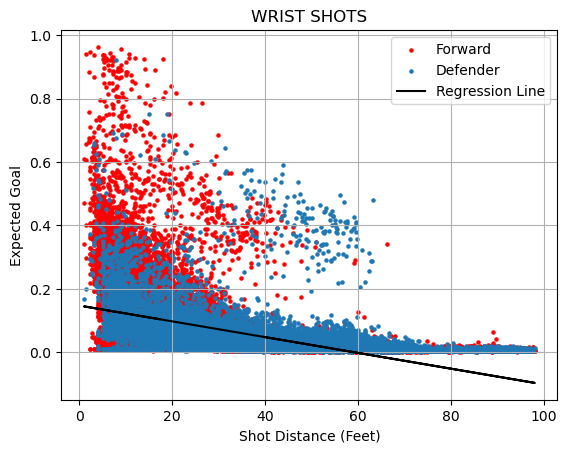

FOR SLAP SHOTS
Count: 14383
Regression Coefficient: -0.0020802745807712666
Correlation Coefficient & p-value: (-0.3955876856871551, 0.0)



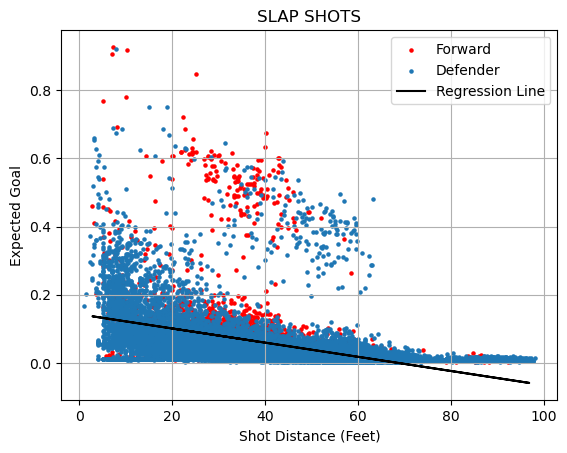

FOR SNAP SHOTS
Count: 17216
Regression Coefficient: -0.002909911529161706
Correlation Coefficient & p-value: (-0.5180764184264682, 0.0)



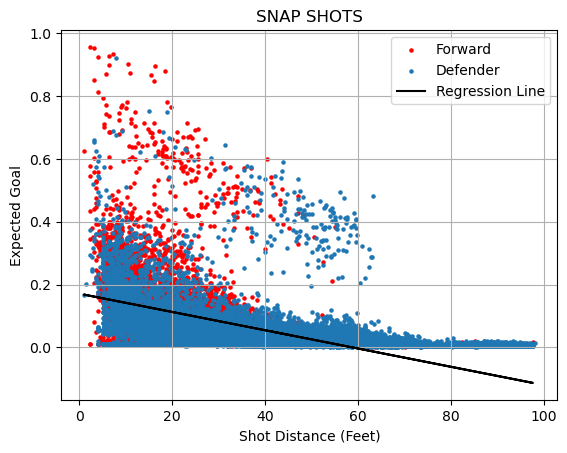

FOR TIP SHOTS
Count: 10777
Regression Coefficient: -0.00232203737033876
Correlation Coefficient & p-value: (-0.34882024492122937, 6.080759190519353e-306)



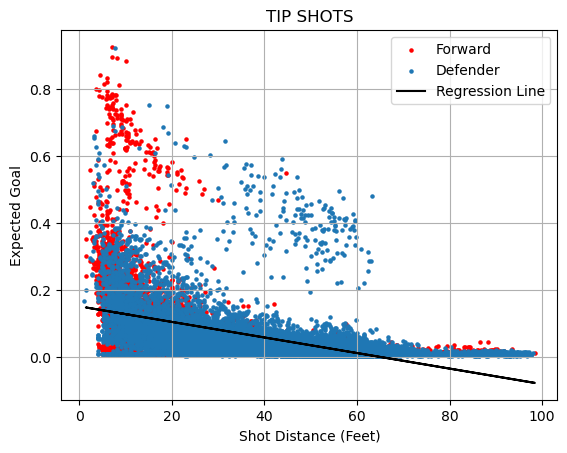

FOR BACK SHOTS
Count: 8664
Regression Coefficient: -0.0028840770033336884
Correlation Coefficient & p-value: (-0.44590467466984707, 0.0)



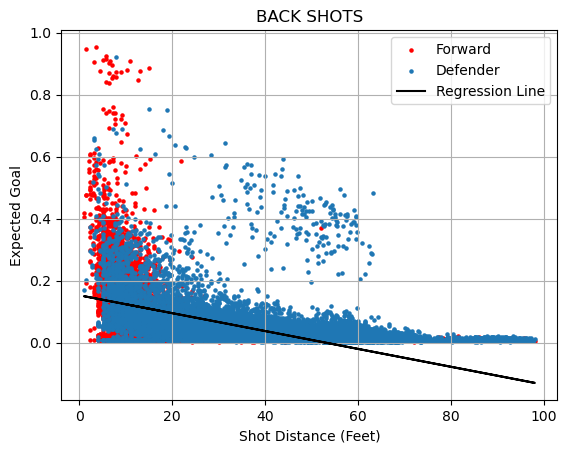

In [4]:
from scipy.stats import pearsonr

# Plot 1 ALL SHOTS

plt.figure()

all_shots = df[(df['shotOnEmptyNet'] == 0.0)]

forward = df[(df['playerPositionThatDidEvent'].isin(['C', 'L', 'R'])) &
         (df['shotOnEmptyNet'] == 0)]

defender = df[(df['playerPositionThatDidEvent'].isin(['D', 'G'])) &
          (df['shotOnEmptyNet'] == 0)]

x = all_shots["shotDistance"]
y = all_shots["xGoal"]
x_forward = forward["shotDistance"]
y_forward = forward["xGoal"]
x_defender = defender["shotDistance"]
y_defender = defender["xGoal"]

plt.title("ALL SHOTS")
plt.xlabel("Shot Distance (Feet)")
plt.ylabel("Expected Goal")

plt.scatter(x_forward, y_forward, s=1, c='red', label = "Forward")
plt.scatter(x_defender, y_defender, s=1, c='C0', label = "Defender")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'black', label = 'Regression Line')
plt.grid(True)
r, p_value = pearsonr(x, y)

print("FOR ALL SHOTS")
print(f"Count: {len(all_shots)}")
print(f"Regression Coefficient: {m}")
print(f"Correlation Coefficient & p-value: {r, p_value}")
print()
plt.legend()

plt.show()

# Plots of Specific Shot Type
shot_type = ["WRIST", "SLAP", "SNAP", "TIP", "BACK"]

for shotType in shot_type:
    plt.figure()
    
    shots = df[(df['shotType'] == shotType) &  
           (df['shotOnEmptyNet'] == 0)]
    forward = df[(df['shotType'] == shotType) &  
                   (df['shotOnEmptyNet'] == 0) &
                   (df['playerPositionThatDidEvent'].isin(['C', 'L', 'R']))]
    shots_not_rebound = df[(df['shotType'] == shotType) &  
                       (df['shotOnEmptyNet'] == 0) &
                       (df['playerPositionThatDidEvent'].isin(['D', 'G']))]

    x = shots["shotDistance"]
    y = shots["xGoal"]
    x_forward = forward["shotDistance"]
    y_forward = forward["xGoal"]
    x_defender = defender["shotDistance"]
    y_defender = defender["xGoal"]
        
    plt.scatter(x_forward, y_forward, s=5, c='red', label = "Forward")
    plt.scatter(x_defender, y_defender, s=5, c='C0', label = "Defender")
    plt.title(f"{shotType} SHOTS")
    plt.xlabel("Shot Distance (Feet)")
    plt.ylabel("Expected Goal")
    
    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b, color = 'black', label = "Regression Line")
    plt.grid(True)
    r, p_value = pearsonr(x, y)
    
    print(f"FOR {shotType} SHOTS")
    print(f"Count: {len(shots)}")
    print(f"Regression Coefficient: {m}")
    print(f"Correlation Coefficient & p-value: {r, p_value}")
    print()
    plt.legend()
    plt.show()




To further our analysis, I wanted to see how different positions can impact shot probability.

Once again, we plotted **shot distance (in feet) against expected goals (xG for all shot types**, but this time we separated the shots taken with a goaltender present based on the **forward and defence positions** for comparison.

The scatter plot shows shots taken by both forwards and defenders, color-coded in the legend, with a regression line overlayed based on all shots taken with a goaltender present. as expected **Shots taken by Forwars hold higher xG than shots taken by defenders**.

We then repeated this process for specific shot types by filtering the dataset for each type and then plotting distance vs. xG to show how **different shot mechanics taken by forwards and defeners impact shot probabilities**.

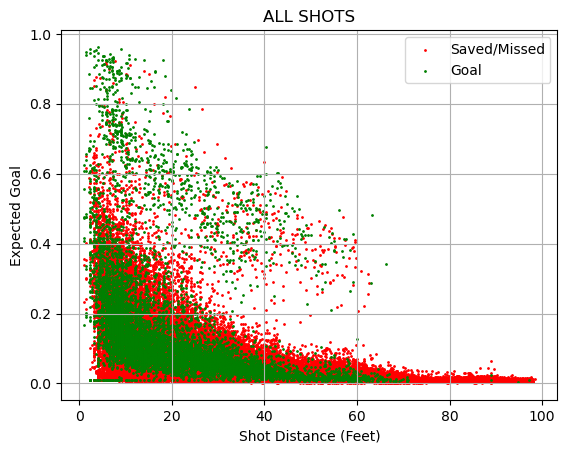

In [6]:
# Plot for all shots with goal tender present comparing shot distance with expected goals,
# color coded with shots resulting in a goal in green and shots missed/saved in red

plt.figure()

all_shots = df[(df['shotOnEmptyNet'] == 0.0)]
shots_scored = df[(df['goal'] == 1.0) & (df['shotOnEmptyNet'] == 0.0)]
shots_saved_missed = df[(df['goal'] == 0.0) & (df['shotOnEmptyNet'] == 0.0)]

x = all_shots['shotDistance']
y = all_shots['xGoal']
x_scored = shots_scored['shotDistance']
y_scored = shots_scored['xGoal']
x_saved_missed = shots_saved_missed['shotDistance']
y_saved_missed = shots_saved_missed['xGoal']

plt.title("ALL SHOTS")
plt.xlabel("Shot Distance (Feet)")
plt.ylabel("Expected Goal")

plt.scatter(x_saved_missed, y_saved_missed, s=1, c='red', label = "Saved/Missed")
plt.scatter(x_scored, y_scored, s=1, c='green', label = "Goal")

plt.legend()
plt.grid(True)

plt.show()



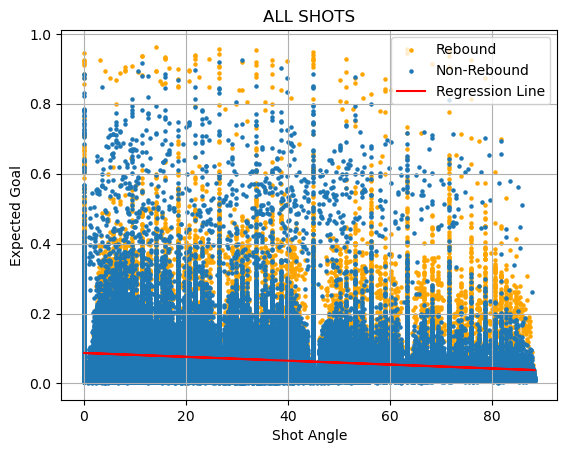

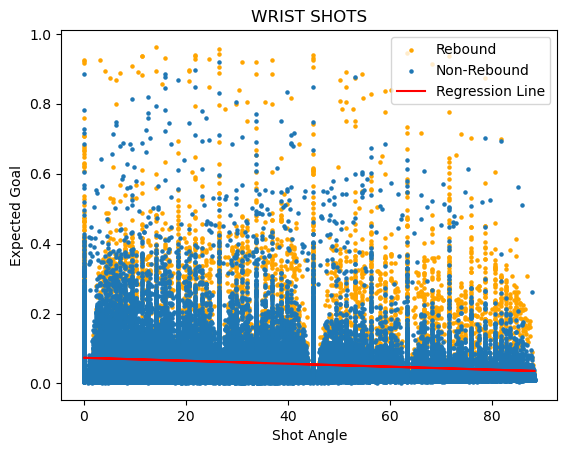

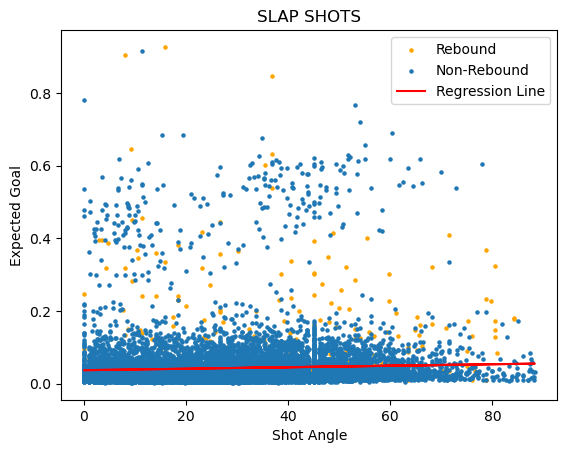

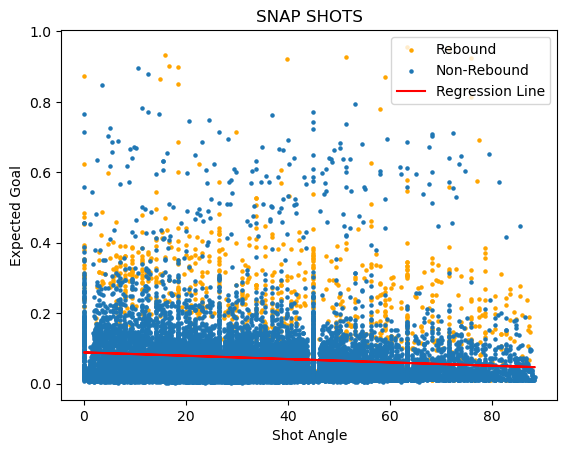

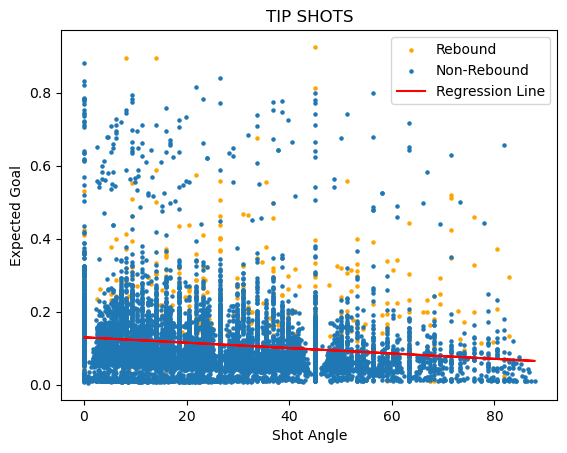

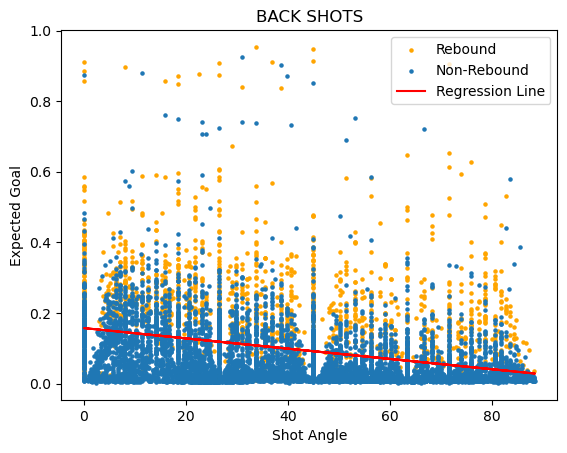

In [7]:
# Charts for xG vs. Shot Angle (different shot types)

plt.figure()

# All Shots
all_shot_angle = df[(df['shotOnEmptyNet'] == 0)] # Filters DF to only shots with goal tender present
shot_angle_rebound = df[(df['shotOnEmptyNet'] == 0) & (df['shotRebound'] == 1)]
shot_angle_not_rebound = df[(df['shotOnEmptyNet'] == 0) & (df['shotRebound'] == 0)]

x = all_shot_angle["shotAngleAdjusted"] # Filters to only shotAngleAdjusted
y = all_shot_angle["xGoal"] # Filters to only xGoal
x_rebound = shot_angle_rebound["shotAngleAdjusted"]
y_rebound = shot_angle_rebound["xGoal"]
x_not_rebound = shot_angle_not_rebound["shotAngleAdjusted"]
y_not_rebound = shot_angle_not_rebound["xGoal"]

plt.scatter(x_rebound, y_rebound, s=5, c='orange', label = "Rebound")
plt.scatter(x_not_rebound, y_not_rebound, s=5, c='C0', label = "Non-Rebound")
plt.title("ALL SHOTS")
plt.xlabel("Shot Angle")
plt.ylabel("Expected Goal")
plt.grid(True)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red', label = "Regression Line")
plt.legend()
plt.show()

shot_types = ["WRIST", "SLAP", "SNAP", "TIP", "BACK"]

for shotType in shot_types:
    # Wrist Shots
    plt.figure()
    shot_angle = df[(df['shotOnEmptyNet'] == 0) &
                (df['shotType'] == shotType)]
    shot_angle_rebound = df[(df['shotOnEmptyNet'] == 0) &
                        (df['shotType'] == shotType) &
                        (df['shotRebound'] == 1.0)]
    shot_angle_no_rebound = df[(df['shotOnEmptyNet'] == 0) &
                           (df['shotType'] == shotType) &
                           (df['shotRebound'] == 0.0)]
    
    x = shot_angle['shotAngleAdjusted']
    y = shot_angle['xGoal']
    x_rebound = shot_angle_rebound['shotAngleAdjusted']
    y_rebound = shot_angle_rebound['xGoal']
    x_no_rebound = shot_angle_no_rebound['shotAngleAdjusted']
    y_no_rebound = shot_angle_no_rebound['xGoal']
    
    plt.scatter(x_rebound, y_rebound, s=5, c='orange', label = "Rebound")
    plt.scatter(x_no_rebound, y_no_rebound, s=5, c='C0', label = "Non-Rebound")

    plt.title(f"{shotType} SHOTS")
    plt.xlabel("Shot Angle")
    plt.ylabel("Expected Goal")
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'red', label = "Regression Line")
    plt.legend()
    plt.show()



After plotting shot distance vs. expected goals, we further our analysis by comparing shot angle vs. xG.

We approach this analysis the same way we approached our plots for shot distance vs xG.

First, we plotted **Shot Angle vs. xG for all shot types**, again restricting the dataset to shots taken with a goaltender present, and then separating rebound and non-rebound attempts for comparison. These categories are both color-coded in the legend, along with a linear regression line based on all shots taken (of certain type) to capture overall trend. 

Here we see a small trend from the regression line **showing that smaller shot angles correspond with greater xG values** although this correlation is not very strong. We can also confirm the correlation between **Rebound shots holding larger xG values than non-rebound shots**.

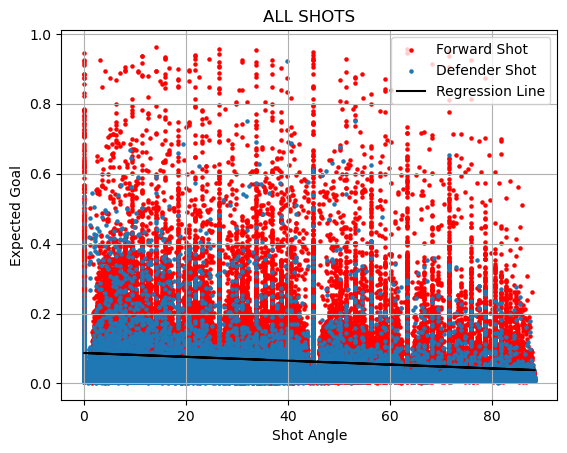

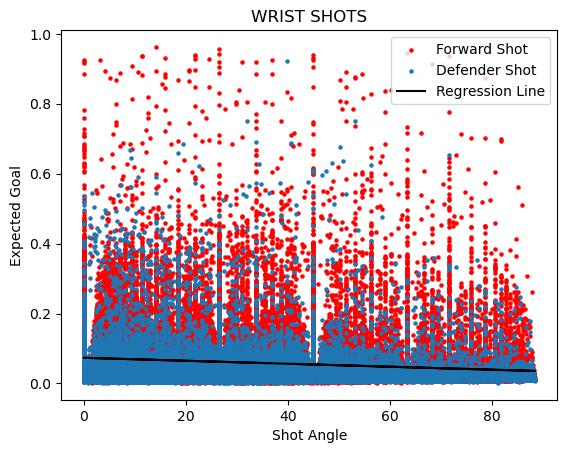

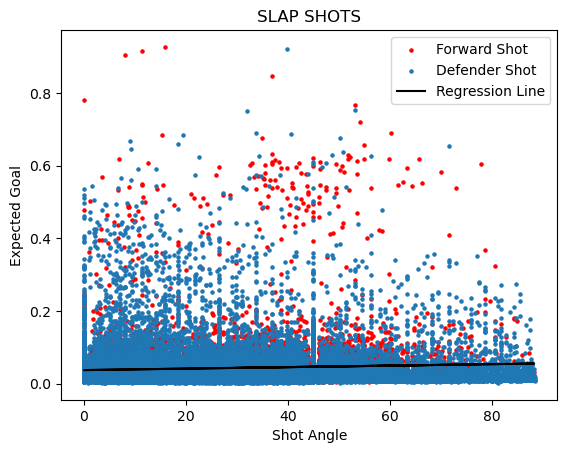

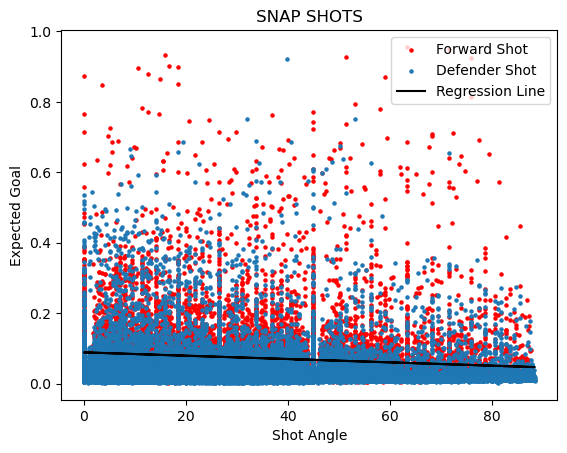

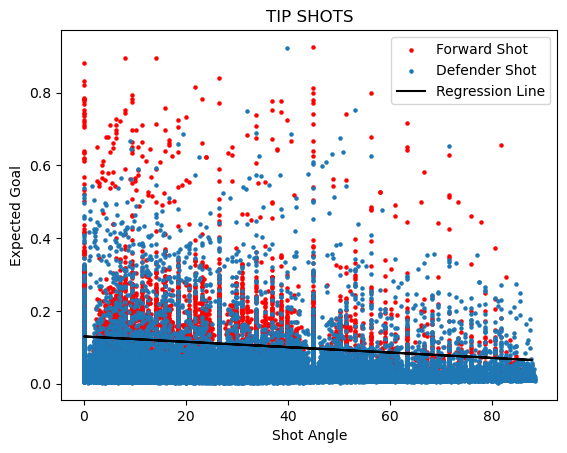

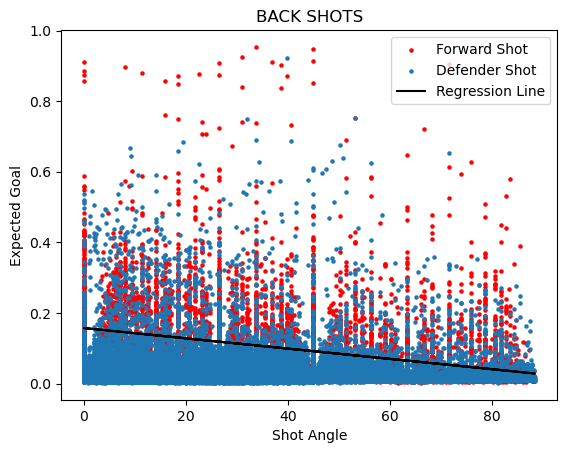

In [9]:
# Charts for xG vs. Shot Angle (different shot types)

plt.figure()

# All Shots
all_shot_angle = df[(df['shotOnEmptyNet'] == 0)] # Filters DF to only shots with goal tender present
shot_angle_forward = df[(df['playerPositionThatDidEvent'].isin(['C', 'L', 'R'])) &
                    (df['shotOnEmptyNet'] == 0)]
shot_angle_defender = df[(df['playerPositionThatDidEvent'].isin(['D', 'G'])) &
                         (df['shotOnEmptyNet'] == 0)]

x = all_shot_angle["shotAngleAdjusted"] # Filters to only shotAngleAdjusted
y = all_shot_angle["xGoal"] # Filters to only xGoal
x_forward = shot_angle_forward["shotAngleAdjusted"]
y_forward = shot_angle_forward["xGoal"]
x_defender = shot_angle_defender["shotAngleAdjusted"]
y_defender = shot_angle_defender["xGoal"]

plt.scatter(x_forward, y_forward, s=5, c='red', label = "Forward Shot")
plt.scatter(x_defender, y_defender, s=5, c='C0', label = "Defender Shot")
plt.title("ALL SHOTS")
plt.xlabel("Shot Angle")
plt.ylabel("Expected Goal")
plt.grid(True)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'black', label = "Regression Line")
plt.legend()
plt.show()

shot_types = ["WRIST", "SLAP", "SNAP", "TIP", "BACK"]

for shotType in shot_types:
    # Wrist Shots
    plt.figure()
    shot_angle = df[(df['shotOnEmptyNet'] == 0) &
                (df['shotType'] == shotType)]
    shot_angle_forward = df[(df['shotOnEmptyNet'] == 0) &
                        (df['shotType'] == shotType) &
                        (df['playerPositionThatDidEvent'].isin(['C', 'L', 'R']))]
    shot_angle_no_rebound = df[(df['shotOnEmptyNet'] == 0) &
                           (df['shotType'] == shotType) &
                           (df['playerPositionThatDidEvent'].isin(['D', 'G']))]
    
    x = shot_angle['shotAngleAdjusted']
    y = shot_angle['xGoal']
    x_forward = shot_angle_forward['shotAngleAdjusted']
    y_forward = shot_angle_forward['xGoal']
    x_defender = shot_angle_defender['shotAngleAdjusted']
    y_defender = shot_angle_defender['xGoal']
    
    plt.scatter(x_forward, y_forward, s=5, c='red', label = "Forward Shot")
    plt.scatter(x_defender, y_defender, s=5, c='C0', label = "Defender Shot")

    plt.title(f"{shotType} SHOTS")
    plt.xlabel("Shot Angle")
    plt.ylabel("Expected Goal")
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'black', label = "Regression Line")
    plt.legend()
    plt.show()



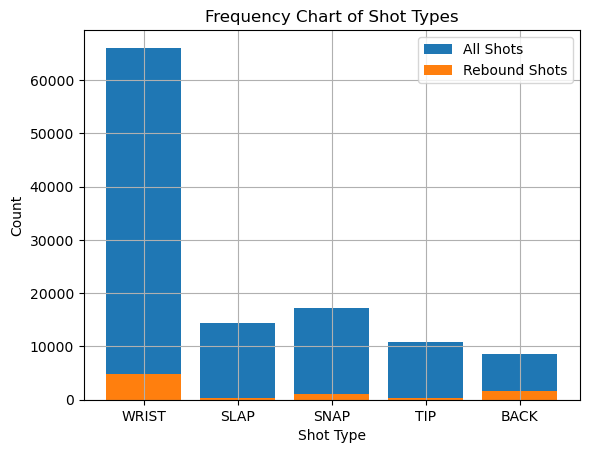

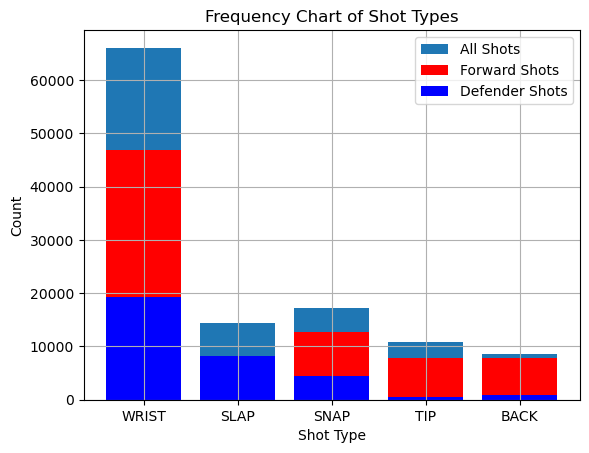

In [10]:
num_wrist_shots = len(df[(df["shotOnEmptyNet"] == 0) & (df["shotType"] == "WRIST")])
num_slap_shots = len(df[(df["shotOnEmptyNet"] == 0) & (df["shotType"] == "SLAP")])
num_snap_shots = len(df[(df["shotOnEmptyNet"] == 0) & (df["shotType"] == "SNAP")])
num_tip_shots = len(df[(df["shotOnEmptyNet"] == 0) & (df["shotType"] == "TIP")])
num_back_shots = len(df[(df["shotOnEmptyNet"] == 0) & (df["shotType"] == "BACK")])

num_wrist_shots_rebound = len(df[(df["shotOnEmptyNet"] == 0) & 
                              (df["shotType"] == "WRIST") & 
                              (df["shotRebound"] == 1)])

num_slap_shots_rebound = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SLAP") & 
                             (df["shotRebound"] == 1)])

num_snap_shots_rebound = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SNAP") & 
                             (df["shotRebound"] == 1)])

num_tip_shots_rebound = len(df[(df["shotOnEmptyNet"] == 0) & 
                            (df["shotType"] == "TIP") & 
                            (df["shotRebound"] == 1)])

num_back_shots_rebound = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "BACK") & 
                             (df["shotRebound"] == 1)])

x = np.array(["WRIST", "SLAP", "SNAP", "TIP", "BACK"])
y = np.array([num_wrist_shots, num_slap_shots, num_snap_shots, num_tip_shots, num_back_shots])
z = np.array([num_wrist_shots_rebound, num_slap_shots_rebound, num_snap_shots_rebound, 
              num_tip_shots_rebound, num_back_shots_rebound])
plt.grid(True)
plt.bar(x, y, label = "All Shots")
plt.bar(x, z, label = "Rebound Shots")
plt.title("Frequency Chart of Shot Types")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.legend()
plt.show()

num_wrist_shots_forward = len(df[(df["shotOnEmptyNet"] == 0) & 
                              (df["shotType"] == "WRIST") &  
                              (df["playerPositionThatDidEvent"].isin(['C', 'L', 'R']))])

num_slap_shots_forward = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SLAP") & 
                             (df["playerPositionThatDidEvent"].isin(['C', 'L', 'R']))])

num_snap_shots_forward = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SNAP") & 
                             (df["playerPositionThatDidEvent"].isin(['C', 'L', 'R']))])

num_tip_shots_forward = len(df[(df["shotOnEmptyNet"] == 0) & 
                            (df["shotType"] == "TIP") & 
                            (df["playerPositionThatDidEvent"].isin(['C', 'L', 'R']))])

num_back_shots_forward = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "BACK") & 
                             (df["playerPositionThatDidEvent"].isin(['C', 'L', 'R']))])

num_wrist_shots_defense = len(df[(df["shotOnEmptyNet"] == 0) & 
                              (df["shotType"] == "WRIST") & 
                              (df["playerPositionThatDidEvent"].isin(['D', 'G']))])

num_slap_shots_defense = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SLAP") & 
                             (df["playerPositionThatDidEvent"].isin(['D', 'G']))])

num_snap_shots_defense = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "SNAP") & 
                             (df["playerPositionThatDidEvent"].isin(['D', 'G']))])

num_tip_shots_defense = len(df[(df["shotOnEmptyNet"] == 0) & 
                            (df["shotType"] == "TIP") & 
                            (df["playerPositionThatDidEvent"].isin(['D', 'G']))])

num_back_shots_defense = len(df[(df["shotOnEmptyNet"] == 0) & 
                             (df["shotType"] == "BACK") & 
                             (df["playerPositionThatDidEvent"].isin(['D', 'G']))])

a = np.array([num_wrist_shots_forward, num_slap_shots_forward, num_snap_shots_forward, num_back_shots_forward, num_back_shots_forward])
z = np.array([num_wrist_shots_defense, num_slap_shots_defense, num_snap_shots_defense, 
              num_tip_shots_defense, num_back_shots_defense])

plt.grid(True)
plt.bar(x, y, label = "All Shots", color = 'C0')
plt.bar(x, a, label = "Forward Shots", color = 'red')
plt.bar(x, z, label = "Defender Shots", color = 'blue')
plt.title("Frequency Chart of Shot Types")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.legend()
plt.show()



In [62]:
import plotly.express as px

fig = px.bar(x, x = "Shot Type", y = "Count", title="Frequency Chart of Shot Types")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0] but received: Shot Type

In [14]:
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model

categorical_cols = ["playerPositionThatDidEvent", "shotType"] # columns in DataFrame that are categorical

# Initialize the encoder
encoder = OneHotEncoder(drop = "first") 
# Fit and transform data
encoded = encoder.fit_transform(df[categorical_cols]).toarray() # looks at the categories and transfroms them into binary values
# Returns a list containing 
encoded_cols = encoder.get_feature_names_out(categorical_cols)
# Create a DataFrame for the encoded variables
encoded_df = pd.DataFrame(encoded, columns = encoded_cols, index = df.index)

print(encoded_df.head())

   playerPositionThatDidEvent_D  playerPositionThatDidEvent_G  \
0                           1.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   playerPositionThatDidEvent_L  playerPositionThatDidEvent_R  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           1.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   playerPositionThatDidEvent_nan  shotType_DEFL  shotType_SLAP  \
0                             0.0            0.0            0.0   
1                             0.0            0.0            0.0   
2                

In [64]:
pd.get_dummies(df, columns = ["playerPositionThatDidEvent", "shotType"], dtype="float")

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,playerPositionThatDidEvent_G,playerPositionThatDidEvent_L,playerPositionThatDidEvent_R,shotType_BACK,shotType_DEFL,shotType_SLAP,shotType_SNAP,shotType_TIP,shotType_WRAP,shotType_WRIST
0,0,39.698866,59.0,59.0,-26.0,26.0,-3.400000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,11.313708,81.0,81.0,8.0,8.0,-3.400000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,45.343136,55.0,55.0,30.0,30.0,-3.800000,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,43.139309,58.0,58.0,-30.0,30.0,-3.400000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,42.201896,-64.0,64.0,34.0,34.0,-15.000000,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122467,76,7.211103,83.0,83.0,4.0,4.0,5.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122468,77,30.000000,82.0,82.0,-29.0,29.0,5.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
122469,78,5.656854,85.0,85.0,4.0,4.0,5.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
122470,79,19.000000,74.0,74.0,11.0,11.0,5.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# Variables to include in logistic regression
# Shot distance (Feet), Shot angle, ShotRebound?, ShotPosition?, ShotType?
from sklearn.linear_model import LogisticRegression

variables = ["shotDistance", "shotAngle", "shotRebound", "playerPositionThatDidEvent", "shotType"]
numeric_cols = ["shotDistance", "shotAngle", "shotRebound"]

X_numeric = df[numeric_cols]

# X_final refers to the combined dataframe containing only variables for our logistic regression model
# X_numeric -- our numeric variables (shotDistance, shotAngle, shotRebound)
# encoded_df -- result of one hot encoding categorical variables (playerPositionThatDidEvent, shotType)
X_final = pd.concat([X_numeric, encoded_df], axis = 1)

y = df["goal"]

logr = LogisticRegression(max_iter=1000, class_weight = 'balanced')
logr.fit(X_final, y)

coefficients = pd.Series(logr.coef_[0], index=X_final.columns)
print(f"Logistic Regression Coefficients: \n\n{coefficients.sort_values(ascending=False)}")

b0 = logr.intercept_[0]
print(f"\n\ny-intercept: {b0}")


Logistic Regression Coefficients: 

shotType_SLAP                     0.811235
shotType_SNAP                     0.770441
shotType_nan                      0.458410
shotType_WRIST                    0.396989
shotAngle                        -0.000146
playerPositionThatDidEvent_G     -0.007602
playerPositionThatDidEvent_R     -0.012119
playerPositionThatDidEvent_L     -0.014114
playerPositionThatDidEvent_nan   -0.015780
shotType_TIP                     -0.038340
shotType_DEFL                    -0.043926
shotDistance                     -0.044945
shotRebound                      -0.065996
playerPositionThatDidEvent_D     -0.177861
shotType_WRAP                    -0.754076
dtype: float64


y-intercept: 0.8792265416240173


<function matplotlib.pyplot.show(close=None, block=None)>

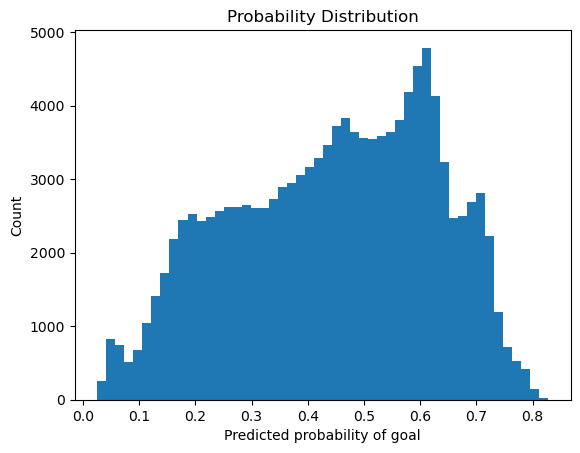

In [56]:
# I NEED TO MAKE ANOTHER XG COLUMN BASED ON MY OWN VARIABLES AND THEN POPULATE THE XG COLUMN
# WITH ALREADY EXISTING DATA FROM 2023-2024 NHL SEASON

# Make confusion matrix, roc curve, and precision recall curve

from sklearn import metrics


actual = df["goal"]
predicted = logr.predict(X_final)
predict_proba = logr.predict_proba(X_final)[:, 1]

# Probability distribution
plt.hist(predict_proba, bins=50)
plt.xlabel("Predicted probability of goal")
plt.ylabel("Count")
plt.title("Probability Distribution")
plt.show


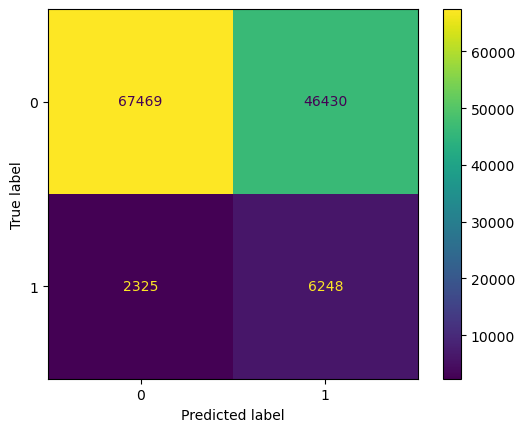

In [58]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

What does this confusion matrix tell us?

Top Left
TN (67,469) → Shots that were not goals and the model correctly predicted no goal.

Top Right
FP (46,430) → Shots that were not goals, but the model incorrectly predicted goal.

Bottom Left
FN (2,325) → Shots that were goals, but the model incorrectly predicted no goal.

Bottom Right
TP (6,248) → Shots that were goals and the model correctly predicted goal.